### **Example**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**About Dataset**

* This dataset contains 5,269 rows and 9 columns (8 input features + 1 target column). It is designed to predict the presence of heart disease based on several risk factors. The target variable (heart_disease) depends on all input features, with age being the strongest predictor.

* Key Relationships:
  * Age: The most critical factor—older individuals are more likely to have heart disease.
  * Blood Pressure: Higher systolic and diastolic pressure increases heart disease likelihood.
  * Lifestyle Factors: Smoking, alcohol consumption, and lack of exercise increase risk.
  *   Cholesterol & Diabetes: Higher values are correlated with a greater risk of cardiovascular diseases.

In [2]:
data = pd.read_csv("heart_disease_dataset_5269.csv")

In [3]:
data.head()

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol,heart_disease
0,69,112,83,Regular,Yes,151,No,208,Yes
1,32,197,84,No,No,118,No,205,Yes
2,78,184,75,Rare,Yes,239,No,168,Yes
3,38,185,75,Rare,Yes,191,No,247,Yes
4,41,103,65,No,Yes,238,No,167,Yes


In [4]:
data.shape

(5269, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 5269 non-null   int64 
 1   systolic_pressure   5269 non-null   int64 
 2   diastolic_pressure  5269 non-null   int64 
 3   physical_activity   5269 non-null   object
 4   smoking             5269 non-null   object
 5   diabetes            5269 non-null   int64 
 6   alcohol             5269 non-null   object
 7   total_cholesterol   5269 non-null   int64 
 8   heart_disease       5269 non-null   object
dtypes: int64(5), object(4)
memory usage: 370.6+ KB


**Using variable threshold**

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
# Step 1: Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Step 2: Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
data_selected = selector.fit_transform(numeric_data)

# Step 3: Get selected column names
selected_columns = numeric_data.columns[selector.get_support()]

print("Selected numeric features:", selected_columns.tolist())

Selected numeric features: ['age', 'systolic_pressure', 'diastolic_pressure', 'diabetes', 'total_cholesterol']


**Using correlation**

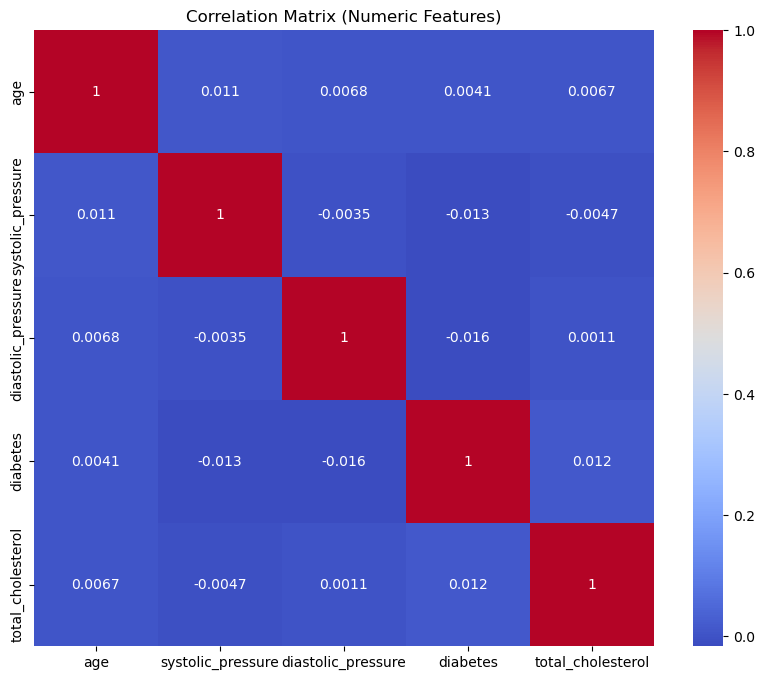

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

**Using the Chi-Square test requires the data to be numeric. Therefore, we need to convert categorical columns into numeric format using appropriate encoding techniques such as Label Encoding or One-Hot Encoding.**

**Label encoder**


In [15]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encoding the heart_disease column
label_encoder = LabelEncoder()
data['heart_disease'] = label_encoder.fit_transform(data['heart_disease'])

#Encoding the alcohol column
data['alcohol'] = label_encoder.fit_transform(data['alcohol'])


**One-hot encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  
physical_activity_encoded = one_hot_encoder.fit_transform(data[['physical_activity']])

# Convert to DataFrame and set column names
physical_activity_encoded_df = pd.DataFrame(physical_activity_encoded, 
                                             columns=one_hot_encoder.get_feature_names_out(['physical_activity']))

# Concatenate the original dataframe with the one-hot encoded columns
data = pd.concat([data, physical_activity_encoded_df], axis=1)

In [22]:
data = data.drop('physical_activity', axis=1)

**Custom Encoder**

In [19]:
priority_mapping = {'Yes': 1, 'No': 0}

# Apply the custom encoding
data['smoking'] = data['smoking'].map(priority_mapping)

In [23]:
data.head(10)

,age,systolic_pressure,diastolic_pressure,smoking,diabetes,alcohol,total_cholesterol,heart_disease,physical_activity_Rare,physical_activity_Regular
0,69,112,83,1,151,0,208,1,0.0,1.0
1,32,197,84,0,118,0,205,1,0.0,0.0
2,78,184,75,1,239,0,168,1,1.0,0.0
3,38,185,75,1,191,0,247,1,1.0,0.0
4,41,103,65,1,238,0,167,1,0.0,0.0
5,20,181,96,0,147,0,275,1,1.0,0.0
6,39,168,80,1,200,1,291,1,1.0,0.0
7,70,118,63,1,319,0,230,1,0.0,1.0
8,19,103,93,0,198,0,248,1,1.0,0.0
9,47,111,87,0,306,1,244,1,0.0,0.0


In [ ]:
target_column = 'heart_disease'  

# Move the target column to the end
columns = [col for col in data.columns if col != target_column]  
columns.append(target_column)  

# Reorder the DataFrame
data = data[columns]


In [25]:
data.head(10)

,age,systolic_pressure,diastolic_pressure,smoking,diabetes,alcohol,total_cholesterol,physical_activity_Rare,physical_activity_Regular,heart_disease
0,69,112,83,1,151,0,208,0.0,1.0,1
1,32,197,84,0,118,0,205,0.0,0.0,1
2,78,184,75,1,239,0,168,1.0,0.0,1
3,38,185,75,1,191,0,247,1.0,0.0,1
4,41,103,65,1,238,0,167,0.0,0.0,1
5,20,181,96,0,147,0,275,1.0,0.0,1
6,39,168,80,1,200,1,291,1.0,0.0,1
7,70,118,63,1,319,0,230,0.0,1.0,1
8,19,103,93,0,198,0,248,1.0,0.0,1
9,47,111,87,0,306,1,244,0.0,0.0,1


**Using chi square**

In [27]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Step 1: Separate features and target
X = data.drop('heart_disease', axis=1)
y = data['heart_disease']

# Step 2: Apply Chi-square test
chi_scores, p_values = chi2(X, y)

# Step 3: Create a DataFrame to display scores
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)


                     Feature   Chi2 Score        P-Value
4                   diabetes  4187.636981   0.000000e+00
0                        age  2411.480720   0.000000e+00
1          systolic_pressure   929.642682  3.531610e-204
6          total_cholesterol   417.552640   8.320451e-93
3                    smoking   114.841258   8.525623e-27
8  physical_activity_Regular   110.710338   6.847999e-26
5                    alcohol    39.227704   3.771505e-10
2         diastolic_pressure    36.444168   1.571025e-09
7     physical_activity_Rare     3.851794   4.969282e-02


In [29]:
# Choose features with p-value < 0.05
selected_features = chi2_results[chi2_results['P-Value'] < 0.05]['Feature'].tolist()

# Prepare data for modeling
X_selected = data[selected_features]
y = data['heart_disease']

print("Selected features:", selected_features)


Selected features: ['diabetes', 'age', 'systolic_pressure', 'total_cholesterol', 'smoking', 'physical_activity_Regular', 'alcohol', 'diastolic_pressure', 'physical_activity_Rare']
